In [ ]:
pip install stumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 KB 14.3 MB/s eta 0:00:00


In [ ]:
import stumpy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
from tqdm.auto import tqdm
from sklearn import decomposition
import shutil

The goal ::: Trying to delete the zero and near zero values then apply motif

### Reading data

In [ ]:
# path of original data folder
csvD_path = "/content/drive/MyDrive/Thesis/3rd_semester/Data/csv_files"

In [ ]:
# lists for the files' names for the two cases : Parkinson's D and Control data
files_co = []
files_pt = []

# Getting the files names for PD and control
for name in os.listdir(csvD_path):
    if 'Co' in name:
        files_co.append(csvD_path+'/' + name)
    elif 'Pt' in name:
        files_pt.append(csvD_path+'/' + name)

### for later
putting the files in 2 different folders depending on whether the file is a control or pd (for later)

In [ ]:
for file in files_co:
    new_path = '/content/drive/MyDrive/Thesis/3rd_semester/Data/csv_files/Control' + file.split('/')[-1]
    shutil.copyfile(file, new_path)
for file in files_pt:
    new_path = '/content/drive/MyDrive/Thesis/3rd_semester/Data/csv_files/PD' + file.split('/')[-1]
    shutil.copyfile(file, new_path)

### PD l2 features for filtering (<50) and then applying motif

In [ ]:
# Reading L2 features for each individual with Parkinson's disease
list_pt = [None] * len(files_pt)
for i, s in enumerate(files_pt):
    list_pt[i] = pd.read_csv(s).iloc[:, 2].values 

In [ ]:
len(list_pt) # number of files for individuals with PD (not count of unique individuals, some individuals performed multiple walks)

214

In [ ]:
len(list_pt[10]) # number of records per walk

12119

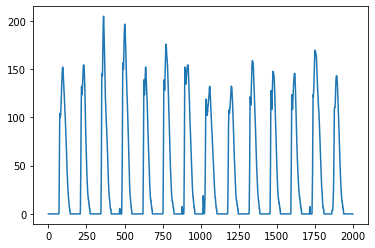

In [ ]:
# taking a look at a part of one random walk
import matplotlib.pyplot as plt
plt.plot(list_pt[10][:2000])

In [ ]:
# filtering the previous series and plotting the result
filtered = list(filter(lambda num: num > 50, list_pt[10]))

In [ ]:
len((filtered))

2966

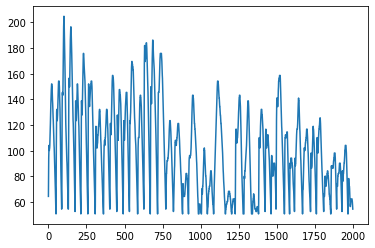

In [ ]:
plt.plot(filtered[:2000])

### Filtering the total series (<50) and try to find the motif

In [ ]:
filtered_features = [[x for x in li if x>50]  for li in list_pt]

In [ ]:
len(filtered_features[200])

5618

In [ ]:
m = 50 #supposing the motif size would be around 50
radius, Ts_idx, subseq_idx = stumpy.ostinato(filtered_features, m)

In [ ]:
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 3.56 in time series 148 starting at subsequence index location 7.


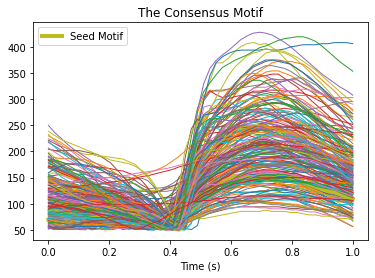

In [ ]:
import matplotlib.pyplot as plt
seed_motif = filtered_features[Ts_idx][subseq_idx : subseq_idx + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(filtered_features), dtype=np.int64)
nn[Ts_idx] = subseq_idx
for i, e in enumerate(filtered_features):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 

### control l2 features for filtering (<50) and then applying motif

In [ ]:
# Reading L2 features for each healthy individual 
list_co = [None] * len(files_co)
for i, s in enumerate(files_co):
    list_co[i] = pd.read_csv(s).iloc[:, 2].values 

In [ ]:
filtered_features_co = [[x for x in li if x>50]  for li in list_co]

In [ ]:
m = 50 #supposing the motif size would be around 50
radius, Ts_idx, subseq_idx = stumpy.ostinato(filtered_features_co, m)

In [ ]:
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 2.79 in time series 27 starting at subsequence index location 34.


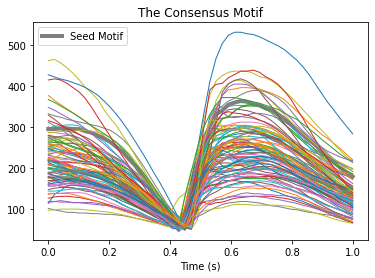

In [ ]:
import matplotlib.pyplot as plt
seed_motif = filtered_features_co[Ts_idx][subseq_idx : subseq_idx + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(filtered_features_co), dtype=np.int64)
nn[Ts_idx] = subseq_idx
for i, e in enumerate(filtered_features_co):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 

### PD l2 features for filtering (<100) and then applying motif

In [ ]:
# Reading L2 features for each individual with Parkinson's disease
list_pt = [None] * len(files_pt)
for i, s in enumerate(files_pt):
    list_pt[i] = pd.read_csv(s).iloc[:, 2].values 

In [ ]:
filtered_features = [[x for x in li if x>100]  for li in list_pt]

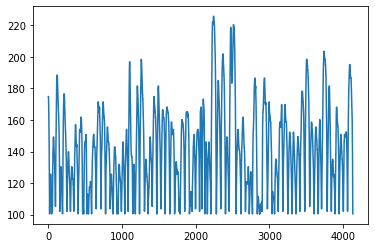

In [ ]:
plt.plot(filtered_features[0])

In [ ]:
m = 50 #supposing the motif size would be around 50
radius, Ts_idx, subseq_idx = stumpy.ostinato(filtered_features, m)

In [ ]:
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 4.99 in time series 169 starting at subsequence index location 1057.


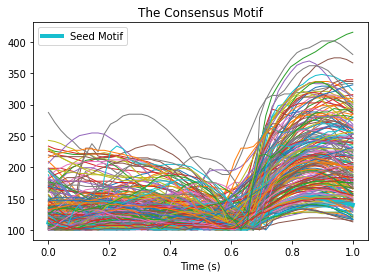

In [ ]:
import matplotlib.pyplot as plt
seed_motif = filtered_features[Ts_idx][subseq_idx : subseq_idx + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(filtered_features), dtype=np.int64)
nn[Ts_idx] = subseq_idx
for i, e in enumerate(filtered_features):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 

### PD l2 features for filtering (<100) and then applying motif

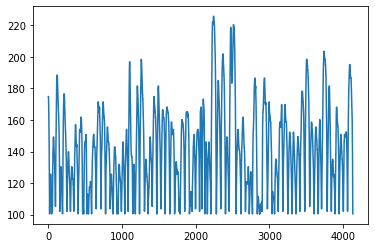

In [ ]:
filtered_features = [[x for x in li if x>100]  for li in list_pt]
plt.plot(filtered_features[0])

In [ ]:
m = 25 #supposing the motif size would be around 50
radius, Ts_idx, subseq_idx = stumpy.ostinato(filtered_features, m)

In [ ]:
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 1.84 in time series 42 starting at subsequence index location 1315.


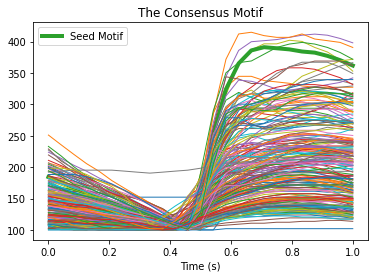

In [ ]:
import matplotlib.pyplot as plt
seed_motif = filtered_features[Ts_idx][subseq_idx : subseq_idx + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(filtered_features), dtype=np.int64)
nn[Ts_idx] = subseq_idx
for i, e in enumerate(filtered_features):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 